In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [2]:
df=pd.read_csv('Medicalpremium.csv')

# Exploring dataset

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [5]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

# Performing EDA to see the distribution of data

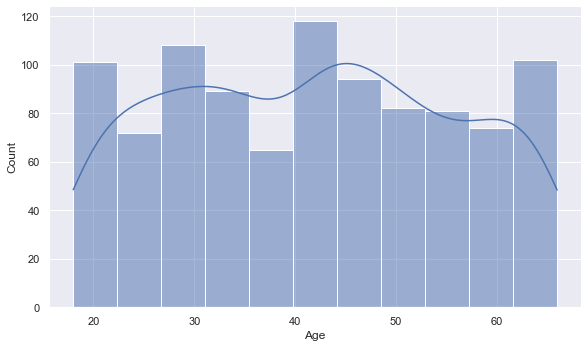

In [6]:
sns.displot(x='Age',data=df,aspect=10/6,kde=True)

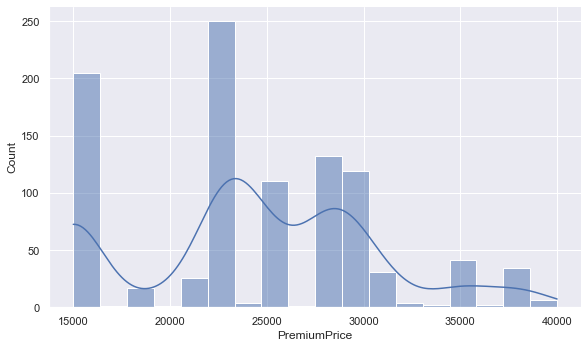

In [7]:
sns.displot(x='PremiumPrice',data=df,aspect=10/6,kde=True)

## Creating salary-bins to visualize distribution of Premium Price and Age

In [8]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

In [9]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel'],
      dtype='object')

In [10]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel
0,45,0,0,0,0,155,57,0,0,0,25000,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,Average
2,36,1,1,0,0,158,59,0,0,1,23000,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,Average
4,38,0,0,0,1,166,88,0,0,1,23000,Basic


<AxesSubplot:xlabel='PremiumLabel', ylabel='Age'>

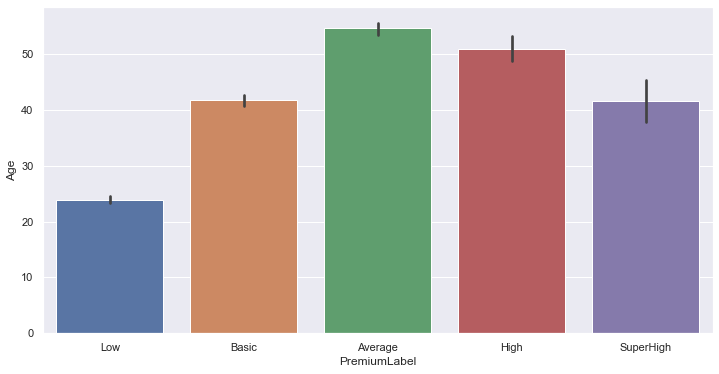

In [11]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(y='Age',x='PremiumLabel',data=df,ax=ax)

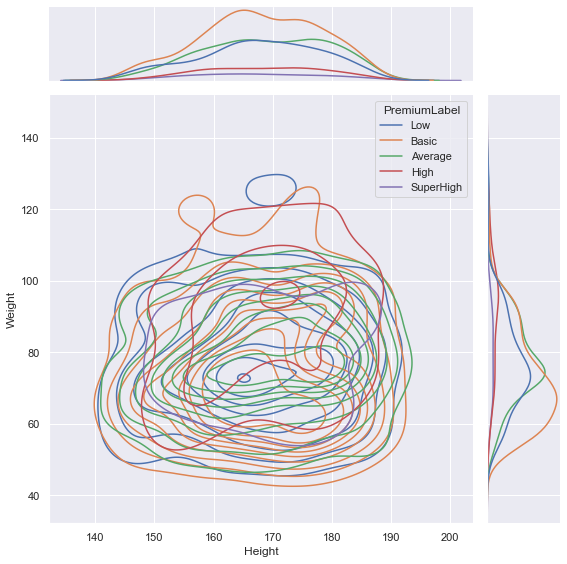

In [12]:
sns.jointplot(x='Height',y='Weight',data=df,hue='PremiumLabel',height=8,kind='kde')

In [13]:
age_lab=['Teen','Young','Middle','Old','SuperOld']
df['AgeLabel']=pd.cut(df['Age'],bins=5,labels=age_lab,precision=0)

In [14]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel', 'AgeLabel'],
      dtype='object')

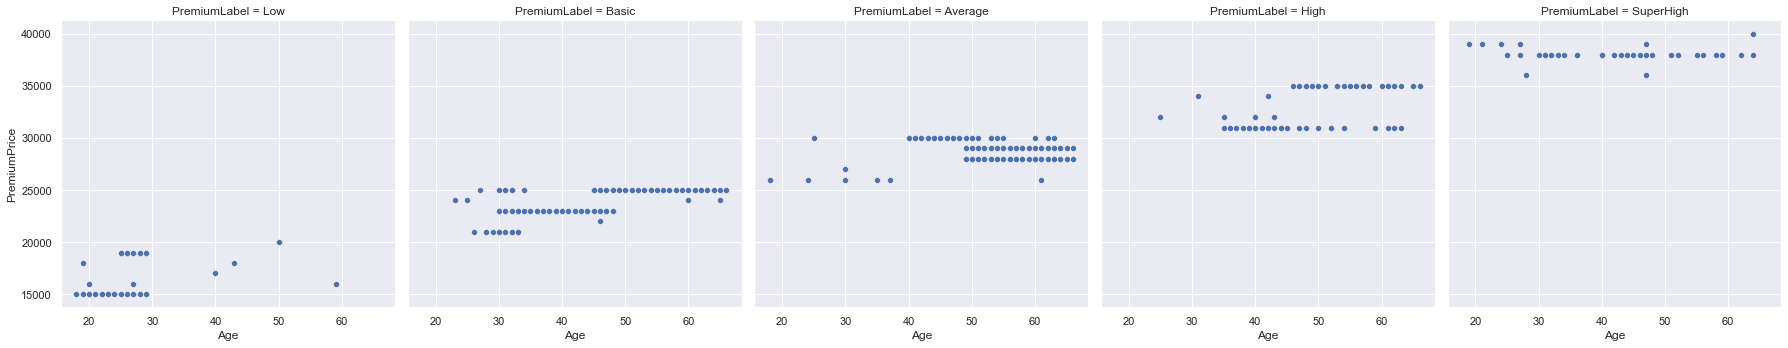

In [15]:
sns.relplot(x='Age',y='PremiumPrice',data=df,col='PremiumLabel',aspect=10/10)

<AxesSubplot:xlabel='PremiumLabel', ylabel='Age'>

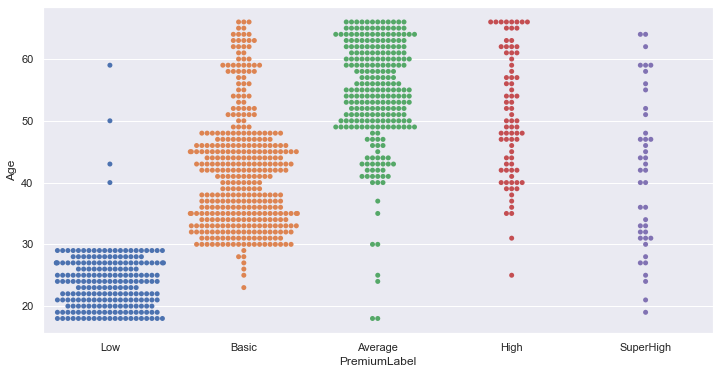

In [16]:
fig,ax=plt.subplots(figsize=(12,6))
sns.swarmplot(x='PremiumLabel',y='Age',data=df,ax=ax)

# Converting new categorical columns to numeric ones

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    int64   
 8   HistoryOfCancerInFamily  986 non-null    int64   
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
 11  PremiumLabel             986 non-null    category
 12  AgeLabel                 986 non-null    category
dtypes: category(2), int64(11)
memory usage: 87.2 KB


In [18]:
df=pd.get_dummies(data=df,columns=['AgeLabel','PremiumLabel'])

In [19]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'AgeLabel_Teen', 'AgeLabel_Young', 'AgeLabel_Middle', 'AgeLabel_Old',
       'AgeLabel_SuperOld', 'PremiumLabel_Low', 'PremiumLabel_Basic',
       'PremiumLabel_Average', 'PremiumLabel_High', 'PremiumLabel_SuperHigh'],
      dtype='object')

In [20]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,AgeLabel_Teen,AgeLabel_Young,AgeLabel_Middle,AgeLabel_Old,AgeLabel_SuperOld,PremiumLabel_Low,PremiumLabel_Basic,PremiumLabel_Average,PremiumLabel_High,PremiumLabel_SuperHigh
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,...,0.202840,0.209939,0.196755,0.199797,0.190669,0.227181,0.388438,0.262677,0.079108,0.042596
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,...,0.402318,0.407472,0.397747,0.400051,0.393028,0.419223,0.487642,0.440312,0.270043,0.202048
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# New Dataset

In [21]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,AgeLabel_Teen,AgeLabel_Young,AgeLabel_Middle,AgeLabel_Old,AgeLabel_SuperOld,PremiumLabel_Low,PremiumLabel_Basic,PremiumLabel_Average,PremiumLabel_High,PremiumLabel_SuperHigh
0,45,0,0,0,0,155,57,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,60,1,0,0,0,180,73,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,36,1,1,0,0,158,59,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,52,1,1,0,1,183,93,0,0,2,...,0,0,0,1,0,0,0,1,0,0
4,38,0,0,0,1,166,88,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [22]:
df.shape

(986, 21)

# Getting Features and Target datasets

In [23]:
x=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

In [24]:
x.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'AgeLabel_Teen',
       'AgeLabel_Young', 'AgeLabel_Middle', 'AgeLabel_Old',
       'AgeLabel_SuperOld', 'PremiumLabel_Low', 'PremiumLabel_Basic',
       'PremiumLabel_Average', 'PremiumLabel_High', 'PremiumLabel_SuperHigh'],
      dtype='object')

### Scalling the dataset

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)

In [61]:
xsc=pd.DataFrame(xsc,columns=x.columns)

In [62]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(xsc,y)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=xsc.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [63]:
mi_scores*100

Age                        96.160993
PremiumLabel_Basic         66.624274
PremiumLabel_Average       58.983889
PremiumLabel_Low           53.381180
NumberOfMajorSurgeries     38.886209
AgeLabel_Teen              36.630836
PremiumLabel_High          29.200847
PremiumLabel_SuperHigh     20.427570
Weight                     20.397867
AgeLabel_Middle            18.436770
AnyChronicDiseases         17.949576
AgeLabel_SuperOld          17.482907
AnyTransplants             13.796310
HistoryOfCancerInFamily    13.501977
AgeLabel_Young             12.760972
AgeLabel_Old               11.298234
BloodPressureProblems       4.603066
Diabetes                    3.191907
KnownAllergies              0.976026
Height                      0.000000
Name: MI Scores, dtype: float64

In [77]:
# feature selection with more than 10% importance.
(mi_scores*100).head(15).index

Index(['Age', 'PremiumLabel_Basic', 'PremiumLabel_Average', 'PremiumLabel_Low',
       'NumberOfMajorSurgeries', 'AgeLabel_Teen', 'PremiumLabel_High',
       'PremiumLabel_SuperHigh', 'Weight', 'AgeLabel_Middle',
       'AnyChronicDiseases', 'AgeLabel_SuperOld', 'AnyTransplants',
       'HistoryOfCancerInFamily', 'AgeLabel_Young'],
      dtype='object')

In [78]:
fea=['Age', 'PremiumLabel_Basic', 'PremiumLabel_Average', 'PremiumLabel_Low',
       'NumberOfMajorSurgeries', 'AgeLabel_Teen', 'PremiumLabel_High',
       'Weight', 'AgeLabel_SuperOld', 'AgeLabel_Middle',
       'PremiumLabel_SuperHigh', 'AgeLabel_Young', 'AgeLabel_Old',
       'AnyChronicDiseases', 'AnyTransplants']
xsc=xsc[fea]

In [79]:
y.shape

(986,)

# Splitting into Test and Train datasets

In [80]:
from sklearn.model_selection import train_test_split

## SPLITTING dataset

In [81]:
xtr,xte,ytr,yte=train_test_split(xsc,y,random_state=33,test_size=0.3)

# Building ML model

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [83]:
reg=RandomForestRegressor(n_jobs=-1,verbose=2)
param_grid={'n_estimators':[60,50,55],'criterion':['mse','mae'],'max_depth':[7],'min_samples_split':[3],'max_features':['auto']}
gs=GridSearchCV(reg,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

In [84]:
gs.fit(xtr,ytr)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
building tree 1 of 60building tree 2 of 60

building tree 3 of 60building tree 4 of 60

building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60building tree 10 of 60
building tree 11 of 60

building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60building tree 18 of 60

building tree 19 of 60
building tree 20 of 60
building tree 21 of 60building tree 22 of 60

building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60building tree 27 of 60

building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60building tree 33 of 60

building tree 34 of 60building tree 35 of 60

building tree 36 of 60building tree 37 of 60

building tree 38 of 60building tree 39 of 60

building tree 40 of 60building tree 41 of 60

buildi

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [7],
                         'max_features': ['auto'], 'min_samples_split': [3],
                         'n_estimators': [60, 50, 55]},
             verbose=1)

In [85]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 60}

In [86]:
gs.best_score_

0.9952017819080469

In [87]:
predicted_y=gs.predict(xte)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished


# Testing the accuracy of model

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2_score(yte,predicted_y)

0.9926527801670557

# 99.4 % Accuracy